# Machine Learning: Auscultando las Redes Neuronales con Python
*Tercera semana*\
Tomado de los **modulos 4,5,6** de las notas de Diego Luis Aristizábal R,\
Quantum computing UNAL, Universidad Nacional de Colombia.\
Sergio Quiroga Sandoval

Programación en las siguientes clases:


*   perceptrón simple (Regresión lineal)
*   Perceptrón simple (clasificación binaria y clasificación multiclase).
*   Perceptrón multicapa (Deep learning)
*   List item





## Regresión Lineal usando Perceptrón Simple
Módulo 5

Se desarrolla un ejemplo con este modelo siguiendo los pasos básicos de aprendizaje:


*   preparación del conjunto de entrenamiento y testeo
*   definición de la función de activación y de la función de pérdida

 Realmente se trata lo más básico. En los módulos posteriores se irá profundizando con más detalles y técnicas.

El algoritmo Perceptrón fue publicado en 1957 por Frank Rosenblatt.\
Uno de los usos del Perceptrón es encontrar un hiperplano capaz de separar correctamente un conjunto de datos que sean linealmente separables, una vez obtenido el hiperplano, este puede utilizarse para clasificaciones binarias.\
También puede usarse para regresión lineal.

Principales aplicaciones del **aprendizaje supervisado**:

*   Clasificación.
*   Regresión.




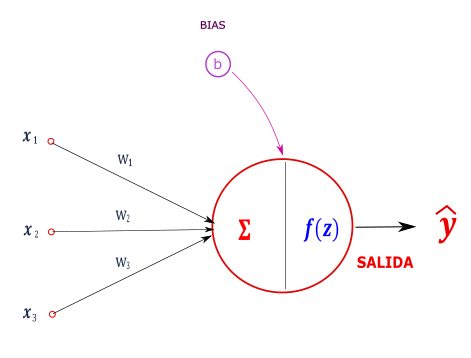

$z = W \cdot x +b$

x:
 [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914]
Shape x:
 (20,)
y:
 [-0.44591308  1.62260416  0.82404809  0.32781486 -1.39789045 -1.23343394
 -1.91782866  1.4718218   0.45066733  0.60551552 -1.8638896   1.71490147
  1.11229636 -0.92620079 -1.03988411 -1.11218329 -0.88072414 -0.10213822
 -0.18010341 -0.86500719]
Shape y:
 (20,)


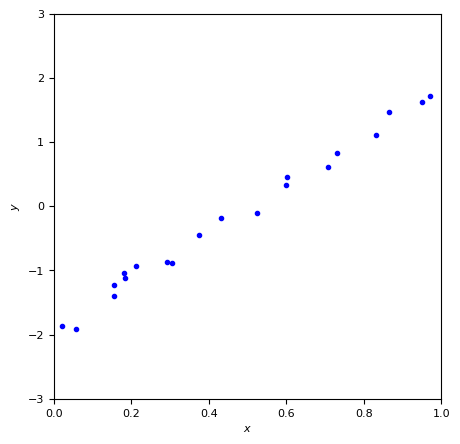

In [14]:
# Generación del dataset, usando datos aleatorios que se acercan a la función
# y = 4x -2
# esto se usará para ver si podemos usar un perceptrón que infiera
# esta recta a partir de los datos.

import matplotlib.pyplot as plt
import numpy as np

#numero de muestras (samples)
n = 20
np.random.seed(42)                           # concepto importante en computación: reproducibilidad
x = np.random.rand(n)                        # Crea un array of de la forma especificada y lo llena de datos aleatorios en distribución uniforme entre 0 y 1.
y = 4*x - 2 + (np.random.rand(n)- 0.5) * 0.5

print("x:\n",x)
print("Shape x:\n", np.shape(x))
print("y:\n",y)
print("Shape y:\n", np.shape(x))

"""
graficar
"""
fig, ax = plt.subplots(figsize=(5, 5))

ax.set(xlim=(0, 1),  ylim=(-3, 3))
ax.plot(x, y, "b.")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("$x$", fontsize=8)
plt.ylabel("$y$", fontsize=8)  #observe la orientación de la y
#plt.ylabel("$y$", rotation=0, fontsize=8)
# plt.grid(True)
plt.show()

Tomado el dataset anterior el Perceptrón debe predecir que la mejor recta que se ajusta es $y = 4x-2$

El código comienza tomando el dataset y examinando su forma (shape) para luego adaptarla a una forma (shape) adecuada para el tratamiento matricial de los algoritmos de entrenamiento vía retropropagación (bakpropagation)


In [15]:
#Dataset y formato matricial

#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y)
#m:número de características
m = 1

X_train = np.zeros((n,m))
X_train[:,0] = x
y_train = np.zeros((n,1))
y_train[:,0] = y

print("X_train como vector columna:\n",X_train)
print("Shape X_train:\n", np.shape(X_train))
print("y_train como vector columna:\n",y_train)
print("Shape y_train:\n", np.shape(y_train))


X_train como vector columna:
 [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]
 [0.02058449]
 [0.96990985]
 [0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]
 [0.30424224]
 [0.52475643]
 [0.43194502]
 [0.29122914]]
Shape X_train:
 (20, 1)
y_train como vector columna:
 [[-0.44591308]
 [ 1.62260416]
 [ 0.82404809]
 [ 0.32781486]
 [-1.39789045]
 [-1.23343394]
 [-1.91782866]
 [ 1.4718218 ]
 [ 0.45066733]
 [ 0.60551552]
 [-1.8638896 ]
 [ 1.71490147]
 [ 1.11229636]
 [-0.92620079]
 [-1.03988411]
 [-1.11218329]
 [-0.88072414]
 [-0.10213822]
 [-0.18010341]
 [-0.86500719]]
Shape y_train:
 (20, 1)


In [16]:
#número de perceptrones
k = 1

#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y)
#m:número de características
m = 1

X_train = np.zeros((n,m))
X_train[:,0] = x
y_train = np.zeros((n,1))
y_train[:,0] = y

#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 1, k =1
W = np.zeros((m,k))

#bias
#se inicializó en 1
#su forma mx1
b = np.ones((m,1))

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion y su derivada
#en este ejemplo es la función Identidad
def identidad(z):
    return z
"""
Utilizar una función de activación identidad es como no utilizar ninguna,
ya que la salida del Perceptrón será directamente el producto de las entradas por los pesos más el bias,
"""
#derivada de la función de activación (dy/dz)
#derivada de la función identidad
def d_identidad(z):
    return 1

#función de pérdida y su derivada
#en este caso es la MSE (Mean Square Error)
def L(y_hat):
    MSE = pow((y_hat - y_train),2).mean()
    return MSE
#dL_dz
def dL(y_hat):
    dL_dy = (2/n)*(y_hat - y_train)
    return dL_dy


def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,k))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    MSE = L(y_hat)

    return grad_W.T, grad_b, MSE


"""
ENTRENAMIENTO
"""

#tasa de aprendizaje
eta = 0.5

#número de épcas
epocas = 200

#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = identidad(z)
    MSE = L(y_hat)

    return y_hat, MSE


#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, MCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, MCE


def entrenar(W, b, eta, epocas):
    for i in range(0,epocas):
       #valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, MSE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w  # Gradient descent
       b = b - eta*grad_b  # Gradient descent

       #desplegar los valores de la función de pérdida
       print("MSE",MSE)

    return W, b

W, b  = entrenar(W, b, eta, epocas )


pendiente = W[0,0]
intercepto = b[0,0]

print("Pendiente=",pendiente)
print("Intercepto=",intercepto)



MSE 2.678695175268678
MSE 1.4127798111520784
MSE 1.1695245765521316
MSE 1.0037720055513177
MSE 0.8636488804400008
MSE 0.7434416438751579
MSE 0.6402287429077577
MSE 0.5516029487747862
MSE 0.4755024241385681
MSE 0.4101569907579369
MSE 0.35404665864978574
MSE 0.3058662547794609
MSE 0.2644950628798253
MSE 0.22897075461941566
MSE 0.19846700504308518
MSE 0.17227427156620376
MSE 0.14978328942401842
MSE 0.13047089966650893
MSE 0.11388788004610746
MSE 0.09964849573460921
MSE 0.0874215268102588
MSE 0.07692256380689984
MSE 0.06790739211325317
MSE 0.060166311337949384
MSE 0.05351925750402092
MSE 0.04781161461104134
MSE 0.04291061813836393
MSE 0.03870226683195321
MSE 0.03508867094040313
MSE 0.03198577521790579
MSE 0.029321403729326796
MSE 0.027033580977926335
MSE 0.025069090303760967
MSE 0.023382236019913828
MSE 0.021933780492812728
MSE 0.020690031442239833
MSE 0.01962205823087243
MSE 0.018705018913597788
MSE 0.017917582393209012
MSE 0.017241432241343394
MSE 0.01666084064312524
MSE 0.01616230255511

Observa cómo desciende la función de pérdida MSE. También se despliegan los valores de la pendiente y el intercepto de la recta predicha.

Los hiperparámetros tasa de aprendizaje $\eta$ y épocas usadas fueron respectivamente 0.5 y 200.

Graficar la recta predicha por el perceptrón

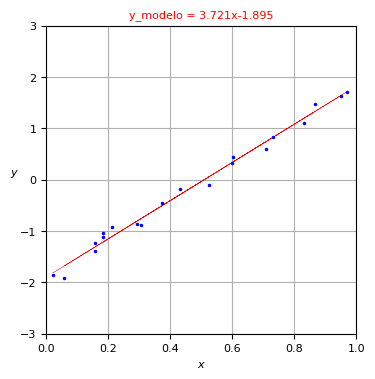

In [17]:
def visualizar():
    """
    graficar
    """
    fig, ax = plt.subplots(figsize=(4, 4))

    y_hat = pendiente*X_train +intercepto
    ax.set(xlim=(0, 1),  ylim=(-3, 3))
    ax.plot(x, y_hat, "r",linewidth=0.2, linestyle="-")
    ax.plot(x, y_train, "b.",markersize= 3)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.xlabel("$x$", fontsize=8)
    plt.ylabel("$y$", rotation=0, fontsize=8)

    m = str(round(pendiente,3))
    b = str(round(intercepto,3))
    titulo = "y_modelo = " + m+"x" + b

    plt.rc('text', color='red')
    ax.set_title(titulo, fontsize=8)
    plt.grid(True)
    plt.show()

visualizar()

Testeando el modelo

% de error 10.4150548888035


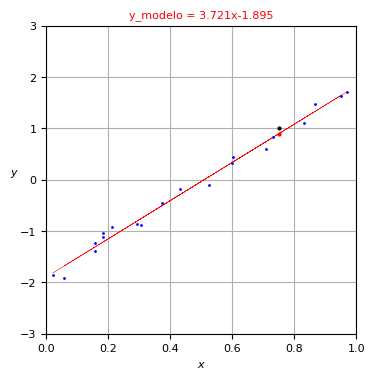

In [18]:
def visualizar(x_test, y_test, y_real):
    """
    graficar
    """
    fig, ax = plt.subplots(figsize=(4, 4))

    y_hat = pendiente*X_train +intercepto
    ax.set(xlim=(0, 1),  ylim=(-3, 3))
    ax.plot(x, y_hat, "r",linewidth=0.2, linestyle="-")
    ax.plot(x, y_train, "b.", markersize=2)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.xlabel("$x$", fontsize=8)
    plt.ylabel("$y$", rotation=0, fontsize=8)

    #graficar punto resultado con testeo
    plt.plot(x_test, y_test,'r.',markersize=4)
    plt.plot(x_test, y_real,'k.',markersize=4)


    m = str(round(pendiente,3))
    b = str(round(intercepto,3))
    titulo = "y_modelo = " + m+"x" + b

    plt.rc('text', color='red')
    ax.set_title(titulo, fontsize=8)
    plt.grid(True)
    plt.show()
"""
TESTEAR
"""
def testear(x_test):
    y_test = pendiente*x_test + intercepto
    y_real = 4*x_test - 2
    #porcentaje de error
    porcentaje_error = abs(100.0*((y_real-y_test)/y_real))

    return y_test, y_real , porcentaje_error

#testeo
x_test =0.75
y_test, y_real , porcentaje_error  = testear(0.75)

y_test, y_real, porcentaje_error = testear(x_test)

print("% de error", porcentaje_error)

visualizar(x_test, y_test, y_real)

Este es el resultado con una muestra x_test = 0.75, se predice el punto rojo, el valor real es el punto negro.



Interpretación sobre el gradiente descendente.\
Veamos gráficamente cómo disminuye la función de pérdida al actualizar W, b,
Usaremos el codigo que se tiene pero guardaremos los valores de los parámetros en cada época para poder graficar

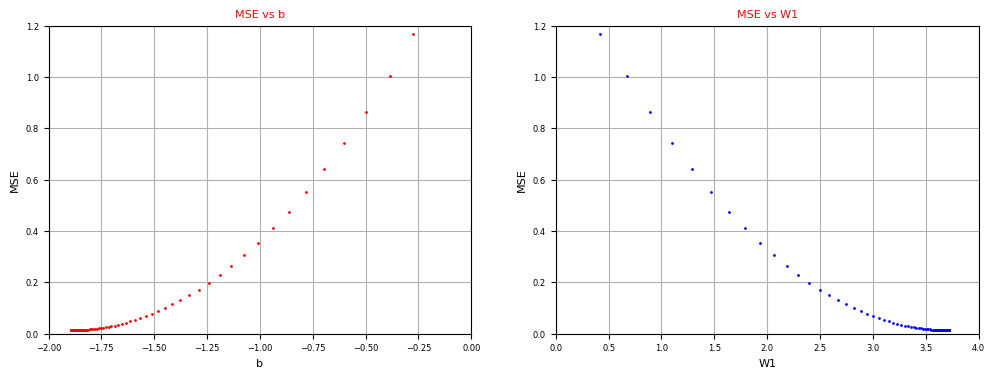

In [20]:
#app_5.6
import matplotlib.pyplot as plt
import numpy as np


"""
DATASET Y SU PREROCESAMIENTO
"""
#dataset
x = [0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864, 0.15599452,
 0.05808361, 0.86617615, 0.60111501, 0.70807258, 0.02058449, 0.96990985,
 0.83244264, 0.21233911, 0.18182497, 0.18340451, 0.30424224, 0.52475643,
 0.43194502, 0.29122914]

y = [-0.44591308,  1.62260416,  0.82404809,  0.32781486, -1.39789045, -1.23343394,
 -1.91782866,  1.4718218,   0.45066733,  0.60551552, -1.8638896,   1.71490147,
  1.11229636, -0.92620079, -1.03988411, -1.11218329, -0.88072414, -0.10213822,
 -0.18010341, -0.86500719]


#número de perceptrones
k = 1
#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y)
#m:número de características
m = 1

X_train = np.zeros((n,m))
X_train[:,0] = x
y_train = np.zeros((n,1))
y_train[:,0] = y

#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 1, k =1
W = np.zeros((m,k))

#bias
#se inicializó en 1
#su forma mx1
b = np.ones((m,1))


"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion y su derivada
#en este ejemplo es la función Identidad
def identidad(z):

    return z

#derivada de la función de activación (dy/dz)
#derivada de la función identidad
def d_identidad(z):

    return 1


#en este caso es la MSE
def L(y_hat):
    MSE = pow((y_hat - y_train),2).mean()

    return MSE



#dL_dz
def dL(y_hat):
    dL_dy = (2/n)*(y_hat - y_train)
    return dL_dy



def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,k))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    MSE = L(y_hat)
    return grad_W.T, grad_b, MSE

"""
ENTRENAMIENTO
"""
#tasa de aprendizaja
eta =0.5

#número de épcas
epocas = 200

#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = identidad(z)
    MSE = L(y_hat)

    return y_hat, MSE

#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, MCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, MCE

def entrenar(W, b, eta, epocas):
    #listas para almacenar todos los
    #errores, los pesos y los bias al
    #pasar todas las epocas
    historia_mse = []
    historia_pesos = []
    historia_bias = []

    for i in range(0,epocas):
       #valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, MSE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w
       b = b - eta*grad_b

       #desplegar los valores de la función de pérdida
       #print("MSE",MSE)
       historia_mse.append(MSE)
       historia_pesos.append(W[0,0])
       historia_bias.append(b[0,0])


    return historia_mse, historia_pesos, historia_bias

historia_mse, historia_pesos, historia_bias  = entrenar(W, b, eta, epocas )


def visualizar():
    #GRÁFICOS
    #GRÁFICA QUE ILUSTRA EL DESCENSO DEL GRADIENTE
    #2 gráficos simultaneamente en paneles separados
    fig, axes = plt.subplots(1, 2,figsize=(12, 4))
    ax = axes.ravel()

    #gráfica de ax[0]
    #intervalos a graficar
    ax[0].set(xlim = (-2, 0), ylim=(0, 1.2))


    #marcar ejes y título
    ax[0].set_xlabel("b", fontsize=8)
    ax[0].set_ylabel("MSE", fontsize=8)
    ax[0].set_title("MSE vs b", fontsize=8)
    #tamaño de las etiquetas de los ejes
    ax[0].xaxis.set_tick_params(labelsize=6)
    ax[0].yaxis.set_tick_params(labelsize=6)
    #con cuadrículas
    ax[0].grid(True)
    #graficar
    ax[0].plot(historia_bias, historia_mse,"r.", markersize= 2)


    #gráfica de ax[1]
    #intervalos a graficar
    ax[1].set(xlim = (0, 4), ylim=(0, 1.2))
    #marcar ejes y título
    ax[1].set_xlabel("W1", fontsize=8)
    ax[1].set_ylabel("MSE", fontsize=8)
    ax[1].set_title("MSE vs W1", fontsize=8)
    #tamaño de las etiquetas de los ejes
    ax[1].xaxis.set_tick_params(labelsize=6)
    ax[1].yaxis.set_tick_params(labelsize=6)
    #con cuadrículas
    ax[1].grid(True)
    #graficar
    ax[1].plot(historia_pesos, historia_mse,"b.", markersize= 2)

    plt.show()


visualizar()

## Clasificación Binaria usando Perceptrón Simple
Módulo 6

*   Se implementan dos ejemplos codificados con Python:  el primero con dos características de entrada y el segundo con ocho.
*   En el segundo ejemplo se realizó una pequeña introducción de alguas métricas que evalúan los modelos Machine Learnig.

La clasificación es un tipo de machine learning supervisado en el que un algoritmo “aprende” a clasificar a partir observaciones procedentes de ejemplos de datos etiquetados.\
En el caso de clasificación binaria se predice a cuál de las dos clases (categorías) pertenece una instancia de datos. Las etiquetas pueden ser por ejemplo 0 o 1, falso o verdadero, blanco o negro.\
Un Perceptrón solamente es capaz de trabajar para aquellos casos donde las muestras son linealmente separables

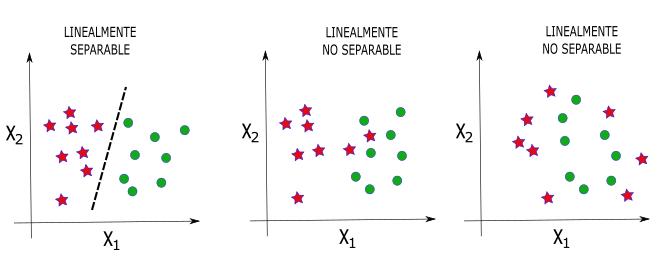

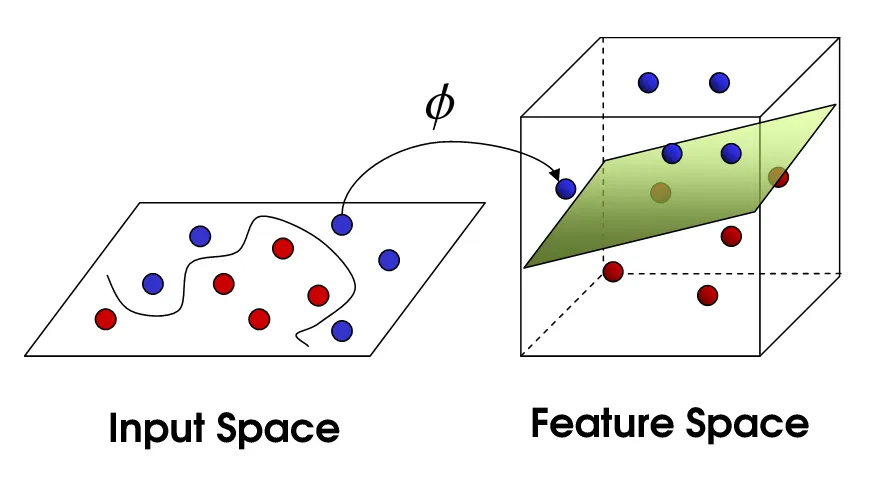

Imagen tomada de: https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f

En este tipo de clasificación da muy buenos resultados para el Perceptrón Simple usar la combinación función de activación **Sigmoide** con función de pérdida la **Binary-Cross-Entropy** (BCE). La actualización de pesos se implementa vía backpropagation con el gradiente descendente.
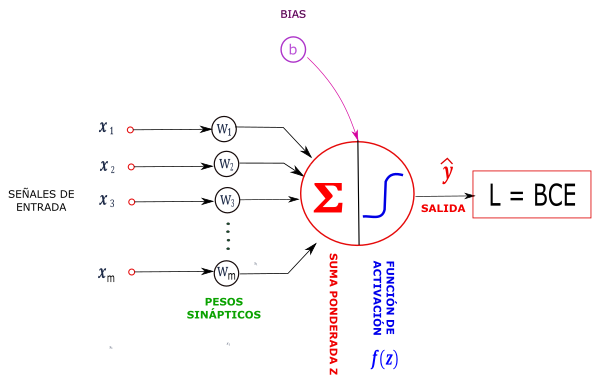

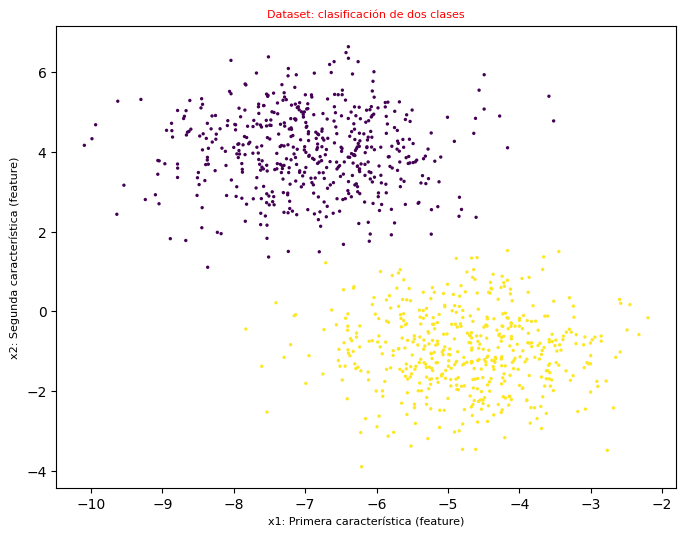

In [22]:
#app_6.1
import numpy as np
#paquete para desplegar plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

"""
importar el dataset
"""
np.random.seed(122)
X,y = make_blobs(n_samples=1000,centers=2)


"""
Graficar los datos
"""
def visualizar():#graficar los datos
   fig = plt.figure(figsize=(8,6))
   plt.scatter(X[:,0], X[:,1], c=y, s=2)
   plt.title("Dataset")
   plt.xlabel('x1: Primera característica (feature)', fontsize=8)
   plt.ylabel('x2: Segunda característica (feature)', fontsize=8)
   plt.title("Dataset: clasificación de dos clases", fontsize=8)
   plt.show()


visualizar( )

Auscultar un poco el contenido y las formas de los examples del dataset.

In [23]:
#formas (shape)
print("Forma (shape) de X = ", np.shape(X))
print("Forma (shape) de y = ", np.shape(y))
#desplegar el valor del contenido de X
print("X = ", X[:])
#desplegar el valor del contenido de y
print("y = ", y[:])
#desplegar el valor (X,y) del example 15
print("X[15]  = ", X[15])
print("y[15] = ", y[15])

Forma (shape) de X =  (1000, 2)
Forma (shape) de y =  (1000,)
X =  [[-6.15816232  3.98224018]
 [-5.41637786  2.71127545]
 [-7.6261365   4.67619049]
 ...
 [-4.24561905 -1.36613557]
 [-6.53366802 -1.23576446]
 [-6.23353    -0.36579391]]
y =  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0
 0 1 1 1 1

**Preprocesamiento de datos** \
Prepararlos de forma adecuado para un buen análisis.\
 Un punto importante en esta etapa es normalizarlos para que todos estén en un rango de -1 a 1 y no existan problemas (una gran diferencia en escala de los números podría generar problemas al intentar combinar los valores como características durante el modelado).

Normalización de los datos

Forma (shape) de X =  (1000, 2)
X =  [[0.23514128 0.84109902]
 [0.27946793 0.76515027]
 [0.14741988 0.88256726]
 ...
 [0.3494287  0.52149734]
 [0.21270227 0.5292879 ]
 [0.23063755 0.58127453]]


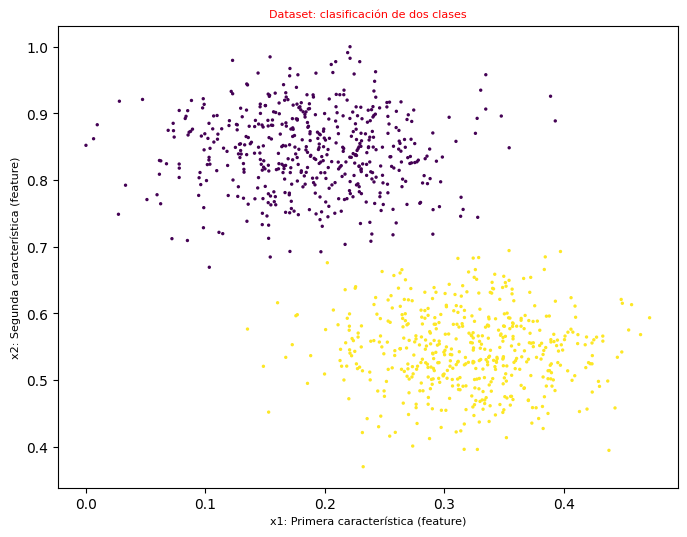

In [24]:
#NORMALIZACIÓN DE LOS DATOS X
X = (X - np.min(X)) / (np.max(X) - np.min(X))

#formas (shape)
print("Forma (shape) de X = ", np.shape(X))
#desplegar el valor del contenido de X ya normalizado
print("X = ", X[:])

"""
Graficar los datos
"""
def visualizar():

   fig = plt.figure(figsize=(8,6))
   plt.scatter(X[:,0], X[:,1], c=y,s=2)
   plt.title("Dataset")
   plt.xlabel('x1: Primera característica (feature)', fontsize=8)
   plt.ylabel('x2: Segunda característica (feature)', fontsize=8)
   plt.title("Dataset: clasificación de dos clases", fontsize=8)
   plt.show()

visualizar()

In [25]:
#convertir y a array con una columna
y_true = np.zeros((len(y), 1))
y_true[:,0] = y
print("Nuevo shape de y, se denominó y_true = ", np.shape(y_true))

print("y_true = ", y_true)
print("Elementos deñ 20 al 30 de y_true = ", y_true[20:30,0])

Nuevo shape de y, se denominó y_true =  (1000, 1)
y_true =  [[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.

El dataset se divide en un conjunto de entrenamiento y otro de testeo.\
 Se puede hacer manualmente, por ejemplo, tomar el 80% dd las muestras (examples) para entrenamiento y el 20% para testeo, pero se prefirió usar la instrucción de la librería (sklearn) para realizar esta tarea.

Shape de X =  (1000, 2)
Shape de y =  (1000,)
Shape de X_train =  (750, 2)
Shape de y_train =  (750, 1)
Shape de X_test =  (250, 2)
Shape de y_test =  (250, 1)


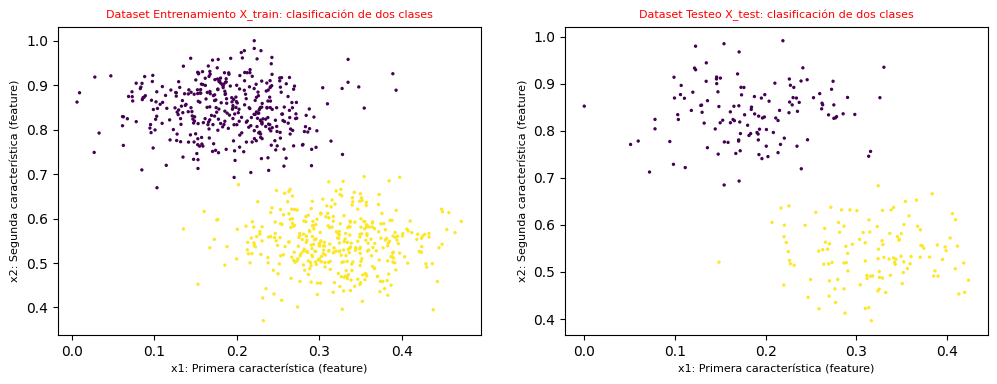

In [27]:
from sklearn.model_selection import train_test_split
"""
dividir el dataset en dos partes:

"""
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

#indagar sobre los shape de los datos
print("Shape de X = ", np.shape(X))
print("Shape de y = ", np.shape(y))
print("Shape de X_train = ", np.shape(X_train))
print("Shape de y_train = ", np.shape(y_train))
print("Shape de X_test = ", np.shape(X_test))
print("Shape de y_test = ", np.shape(y_test))


"""
Graficar
"""
def visualizar():
   #GRÁFICOS
   #2 gráficos simultaneamente en paneles separados
   fig, axes = plt.subplots(1, 2,figsize=(12, 4))
   ax = axes.ravel()

   #graficar los de entrenamiento
   ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=2)
   ax[0].set_xlabel('x1: Primera característica (feature)', fontsize=8)
   ax[0].set_ylabel('x2: Segunda característica (feature)', fontsize=8)
   ax[0].set_title("Dataset Entrenamiento X_train: clasificación de dos clases", fontsize=8)

   #graficar los de testeo
   ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=2)
   ax[1].set_xlabel('x1: Primera característica (feature)', fontsize=8)
   ax[1].set_ylabel('x2: Segunda característica (feature)', fontsize=8)
   ax[1].set_title("Dataset Testeo X_test: clasificación de dos clases", fontsize=8)

   plt.show()

visualizar()

In [28]:
"""
Deplegar la parte del dataset de X_train
entre las posiciones 100:105 de las característics
x1 y x2 y adicionalmente las respectivas etiquetas
(salidas) asociadas.
Para el set de testeo se deseplagarán de 40:50
"""
print("X_train de 100 a 105 de característica x1 = ",X_train[100:105,0])
print("X_train de 100 a 105 de característica x2 = ",X_train[100:105,1])
print("y_train de 100 a 105 = ",y_train[100:105,0])
print("X_test de 40 a 44 de característica x1 = ",X_test[40:44,0])
print("X_test de 40 a 44 de característica x2  = ",X_test[40:44,1])
print("y_test de 40 a 44 = ",y_test[40:44,0])

X_train de 100 a 105 de característica x1 =  [0.24889184 0.24026823 0.30595629 0.2640757  0.20284788]
X_train de 100 a 105 de característica x2 =  [0.76338781 0.91015097 0.54662939 0.82713041 0.81874461]
y_train de 100 a 105 =  [0. 0. 1. 0. 0.]
X_test de 40 a 44 de característica x1 =  [0.19197884 0.27824183 0.30997618 0.14594469]
X_test de 40 a 44 de característica x2  =  [0.78040133 0.82988123 0.52313602 0.91396499]
y_test de 40 a 44 =  [0. 0. 1. 0.]


**Entrenar**


*   Propagación hacia adelante (forwardpropagation):
*   Propagación hacia atrás (backpropagation):
*   Actualzar pesos y BIAS.
*   Repetir los pasos anteriores (épocas) hasta lograr el objetivo.

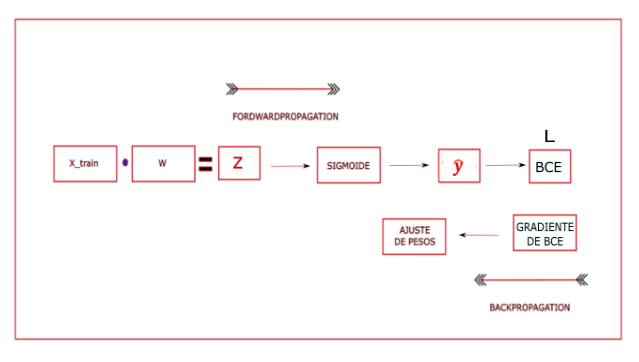
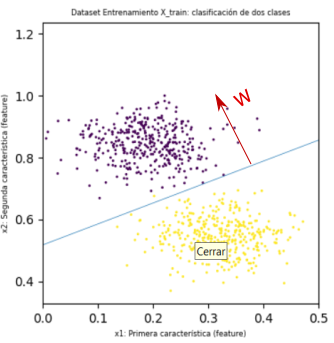




En este ejemplo se escogió como función de activación la función sigmoide, como función de costo (función de pérdida) la función de Binary Cross Entropy para realizar el algoritmo gradiente descendente. Se tomaron 50 épocas y una taza de aprendizaje de 0.1.

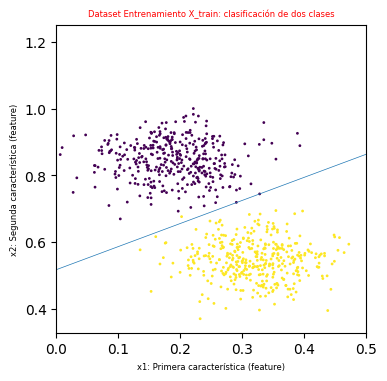

In [29]:
#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y_train)


#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 2, k =1
#número de características (features)
m = 2
k=1
W = np.zeros((m,k))#dimension 2x1

#bias
#se inicializó en 1
#su forma es una matriz
#de 1 filas y k columnas
#k es el número de neuronas
b = np.ones((1,k))

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion
def sigmoide(z):
   y_hat = 1 / (1 + np.exp(-z))
   return y_hat


#L:BCE
def L(y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    term_0 = y_train * np.log(y_hat + 1e-7)
    term_1 = (1-y_train) * np.log(1-y_hat + 1e-7)
    L_bce = -np.mean(term_0+term_1, axis=0)
    return L_bce


#dL_dz
def dL(y_hat):
      dL_dz = y_hat - y_train
      return dL_dz


def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,1))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    BCE = L(y_hat)

    return grad_W.T, grad_b, BCE


"""
ENTRENAMIENTO
"""
#tasa de aprendizaja
eta =0.1

#número de épcas
epocas = 50

#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = sigmoide(z)
    BCE = L(y_hat)

    return y_hat, BCE

#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, BCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, BCE

def entrenar(W, b, eta, epocas):
    for i in range(0,epocas):
       #almacenar el valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, BCE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w
       b = b - eta*grad_b
    return W, b

W, b  = entrenar(W, b, eta, epocas )


def hiperplano():
    pendiente =  -W[0,0]/W[1,0]
    intercepto =  -b[0,0]/W[1,0]
    x1 = np.linspace(0,1)
    x2 = pendiente * x1 + intercepto
    return x1,x2

def visualizar():
    #graficar los datos
    fig = plt.figure(figsize=(4,4))
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=1)
    plt.xlim(0,0.5)
    x1, x2 = hiperplano()
    plt.plot(x1, x2, '-', linewidth = 0.5)
    plt.xlabel('x1: Primera característica (feature)', fontsize=6)
    plt.ylabel('x2: Segunda característica (feature)', fontsize=6)
    plt.title("Dataset Entrenamiento X_train: clasificación de dos clases", fontsize=6)
    plt.show()

visualizar()

Veamos con detalle todo lo que sucedió al entrenar la red (el perceptrón).

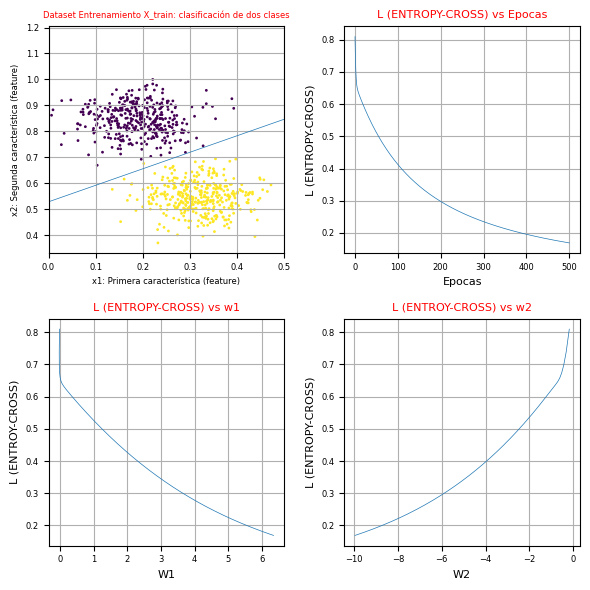

In [30]:

#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y_train)


#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 2, k =1
#número de características (features)
m = 2
k=1
W = np.zeros((m,k))#dimension 2x1

#bias
#se inicializó en 1
#su forma es una matriz
#de 1 filas y k columnas
#k es el número de neuronas
b = np.ones((1,k))

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion
def sigmoide(z):
   y_hat = 1 / (1 + np.exp(-z))
   return y_hat


#L:BCE
def L(y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    term_0 = y_train * np.log(y_hat + 1e-7)
    term_1 = (1-y_train) * np.log(1-y_hat + 1e-7)
    L_bce = -np.mean(term_0+term_1, axis=0)
    return L_bce


#dL_dz
def dL(y_hat):
    dL_dz = y_hat - y_train
    return dL_dz


def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,1))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    BCE = L(y_hat)

    return grad_W.T, grad_b, BCE


"""
ENTRENAMIENTO
"""
#tasa de aprendizaja
eta =0.001

#número de épcas
epocas = 500


#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = sigmoide(z)
    BCE = L(y_hat)

    return y_hat, BCE

#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, BCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, BCE

def entrenar(W, b, eta, epocas):

    #almacenar el valor de la pérdida
    #para si quiere analizar (gráfica,et...)
    historia_L = []
    historia_w1 = []
    historia_w2 = []

    for i in range(0,epocas):
       #almacenar el valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, BCE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w
       b = b - eta*grad_b


       #almacenar las historias de L
       historia_L.append(L)
       #almacenar historias de las componentes de W
       historia_w1.append(W[0,0])
       historia_w2.append(W[1,0])

    return W, b, historia_L, historia_w1, historia_w2

W, b, historia_L, historia_w1, historia_w2  = entrenar(W, b, eta, epocas )


def hiperplano():
    pendiente =  -W[0,0]/W[1,0]
    intercepto =  -b[0,0]/W[1,0]
    x1 = np.linspace(0,1)
    x2 = pendiente * x1 + intercepto
    return x1,x2

def visualizar():
   #graficar los datos
   fig, axes = plt.subplots(2, 2,figsize=(6, 6))
   ax = axes.ravel()

   """
   Gráfica de clases separadas
   """
   ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=1)
   ax[0].set_xlim(0,0.5)
   x1, x2 = hiperplano()
   ax[0].plot(x1, x2, '-', linewidth = 0.5)
   ax[0].set_xlabel('x1: Primera característica (feature)', fontsize=6)
   ax[0].set_ylabel('x2: Segunda característica (feature)', fontsize=6)
   ax[0].set_title("Dataset Entrenamiento X_train: clasificación de dos clases", fontsize=6)
   #tamaño de las etiquetas de los ejes
   ax[0].xaxis.set_tick_params(labelsize=6)
   ax[0].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[0].grid(True)

   """
   Gráfica de L vs Epocas
   """
   x = np.linspace(0,epocas,epocas)
   ax[1].plot(x, historia_L, '-', linewidth = 0.5)
   ax[1].set_xlabel('Epocas', fontsize=8)
   ax[1].set_ylabel('L (ENTROPY-CROSS)', fontsize=8)
   ax[1].set_title("L (ENTROPY-CROSS) vs Epocas", fontsize=8)
   #tamaño de las etiquetas de los ejes
   ax[1].xaxis.set_tick_params(labelsize=6)
   ax[1].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[1].grid(True)

   """
   Gráfica de L vs W1
   """
   ax[2].plot(historia_w1, historia_L, '-', linewidth = 0.5)
   ax[2].set_xlabel('W1', fontsize=8)
   ax[2].set_ylabel('L (ENTROY-CROSS)', fontsize=8)
   ax[2].set_title("L (ENTROPY-CROSS) vs w1", fontsize=8)
   #tamaño de las etiquetas de los ejes
   ax[2].xaxis.set_tick_params(labelsize=6)
   ax[2].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[2].grid(True)


   """
   Gráfica de L vs W1
   """
   ax[3].plot(historia_w2, historia_L, '-', linewidth = 0.5)
   ax[3].set_xlabel('W2', fontsize=8)
   ax[3].set_ylabel('L (ENTROPY-CROSS)', fontsize=8)
   ax[3].set_title("L (ENTROY-CROSS) vs w2", fontsize=8)
   #tamaño de las etiquetas de los ejes
   ax[3].xaxis.set_tick_params(labelsize=6)
   ax[3].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[3].grid(True)

   #mejorar la separacion de los subplots
   fig.tight_layout()
   plt.show()
visualizar()

Tarea:


*   Jugar un poco con los parémetros de la red en [Tensorflow_playground
](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.93810&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


# Referencias


*   Diego Luis Aristizabal, Machine Learning: Auscultando las Redes Neuronales con python, Manipulación de datos (módulo 3).
*   W3 Schools. Matplotlib Pyplot. Scatter y Plot. URL.[En línea]. Recuperado de https://www.w3schools.com/python/matplotlib_pyplot.asp [Consultado en septiembre de 2023].
*   Deisenroth, M.P. , Faisal A.A., Soon C. (2021). MATHEMATICS for MACHNE
LEARNING . Cambridge University Press.
*   VanderPlas, J., (2016). Python Data Science Handbook. O´RELLY.
*   Zhang, Aston and Lipton, Zachary C. and Li, Mu and Smola, Alexander J. (2023). DIVE
INTO DEEP LEARNING. Cambridge University Press.
*   Johansson, R. (2019). Numerical Python. Scientific Computing and Data Science.
Aplications with NumPy, SciPy and Matplotlib. Aress.
*   Torres, J. (2020). Python Deep Learning. Introducción práctica con Keras y
TensorFlow 2. Marcombo.
*   Swamynathan, M., (2017). Mastering Machine Learning width Python in Six Steps.
Apress.
*   Shalev, S. and Ben, D (2014). Understanding Machine Learning. Cambridge University
Press.
*   Arggarwal, C. (2023). Neural Networks and Deep Learning. Springer.


